In [1]:
# import
import torch
import torch.nn as nn
from torchvision import transforms
import pandas as pd
from test import test, load, init_weights
from model import *
import matplotlib.pyplot as plt
import cv2

In [2]:
# test with test data
ageX, ageY = test()

TEST: BATCH 0001 / 0200 | LABEL: 13.67 | PREDICT: 13.84 | MAE LOSS  2.0276
TEST: BATCH 0002 / 0200 | LABEL: 14.17 | PREDICT: 14.53 | MAE LOSS  4.3238
TEST: BATCH 0003 / 0200 | LABEL:  5.67 | PREDICT:  4.94 | MAE LOSS  8.7171
TEST: BATCH 0004 / 0200 | LABEL: 12.83 | PREDICT: 11.99 | MAE LOSS 10.1194
TEST: BATCH 0005 / 0200 | LABEL: 11.33 | PREDICT: 11.73 | MAE LOSS  4.8127
TEST: BATCH 0006 / 0200 | LABEL:  4.67 | PREDICT:  4.10 | MAE LOSS  6.8282
TEST: BATCH 0007 / 0200 | LABEL: 12.17 | PREDICT: 13.02 | MAE LOSS 10.2347
TEST: BATCH 0008 / 0200 | LABEL: 11.00 | PREDICT: 10.75 | MAE LOSS  3.0070
TEST: BATCH 0009 / 0200 | LABEL: 15.17 | PREDICT: 14.65 | MAE LOSS  6.2329
TEST: BATCH 0010 / 0200 | LABEL: 16.50 | PREDICT: 16.98 | MAE LOSS  5.7223
TEST: BATCH 0011 / 0200 | LABEL: 13.67 | PREDICT: 13.50 | MAE LOSS  2.0353
TEST: BATCH 0012 / 0200 | LABEL:  9.67 | PREDICT:  8.21 | MAE LOSS 17.4291
TEST: BATCH 0013 / 0200 | LABEL: 13.33 | PREDICT: 13.71 | MAE LOSS  4.5424
TEST: BATCH 0014 / 0200 |

In [23]:
print('ageX', ageX)
print('ageY', ageY)

ageX [13.666666666666666, 14.166666666666666, 5.666666666666667, 12.833333333333334, 11.333333333333334, 4.666666666666667, 12.166666666666666, 11.0, 15.166666666666666, 16.5, 13.666666666666666, 9.666666666666666, 13.333333333333334, 15.166666666666666, 12.5, 11.5, 16.0, 12.5, 11.5, 14.166666666666666, 13.833333333333334, 5.5, 11.333333333333334, 12.333333333333334, 14.0, 7.666666666666667, 2.5833333333333335, 7.333333333333333, 2.0, 0.9166666666666666, 14.333333333333334, 9.166666666666666, 12.833333333333334, 6.833333333333333, 7.0, 10.333333333333334, 6.0, 15.166666666666666, 14.0, 13.5, 13.0, 12.0, 5.5, 14.5, 15.5, 16.0, 13.5, 11.333333333333334, 10.666666666666666, 12.666666666666666, 12.666666666666666, 12.833333333333334, 11.0, 14.666666666666666, 12.166666666666666, 10.666666666666666, 12.666666666666666, 16.666666666666668, 14.5, 14.333333333333334, 11.833333333333334, 13.0, 12.166666666666666, 11.833333333333334, 9.833333333333334, 16.833333333333332, 13.333333333333334, 14.

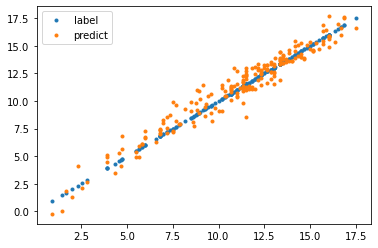

In [24]:
plt.plot(ageX, ageX, '.')
plt.plot(ageX, ageY, '.')
plt.legend(['label', 'predict'])
plt.show()

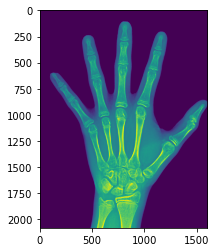

In [25]:
# 이미지 가져오기
imageNumber = 4360
imagePath = "./datasets/test/%d.png" % imageNumber
image = cv2.imread(imagePath, flags=cv2.IMREAD_GRAYSCALE)
plt.imshow(image)
plt.show()

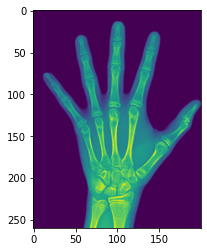

torch.Size([1, 1, 260, 200])


In [26]:
# 이미지 전처리
imageTransforms = transforms.Compose([transforms.ToPILImage(), transforms.Resize(size=(260, 200))])
transFormedImage = imageTransforms(image)
plt.imshow(transFormedImage)
plt.show()
imageTransformsTensor = transforms.Compose([transforms.ToPILImage(), transforms.Resize(size=(260, 200)), transforms.ToTensor()])
transformedImageTensor = imageTransformsTensor((image[:, :, np.newaxis]/255.0).astype(np.float32)).unsqueeze(0)

In [27]:
# csv file에서 데이터 label data 불러오기
label_data_dir = "./labels/test/test.csv"
label_data = pd.read_csv(label_data_dir)
dataRow = label_data.loc[label_data['id'] == imageNumber]
boneage = int(dataRow['boneage'])
print('골 연령: %d 개월' %boneage)

골 연령: 164 개월


In [38]:
# 연산 프로세서 정의하기
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 모델 불러오기를 위한 경로
checkpoint_dir = "./checkpoint/train"

# 네트워크 정의하기
classificationModel = ClassificationModel().to(device)

# 네트워크 초기화하기
init_weights(classificationModel)

# cost function 정의하기
MAELoss = nn.L1Loss().to(device)

# Optimizer 설정하기
optim = torch.optim.Adam(classificationModel.parameters(), lr=2e-5, betas=(0.5, 0.999))

# 모델 불러오기
classificationModel, optim, startEpoch = load(checkpoint_dir=checkpoint_dir, classificationModel=classificationModel, optim=optim)

In [39]:
# 결과 출력하기
with torch.no_grad():
    classificationModel.eval()
    output = classificationModel(transformedImageTensor)
    labelBoneAgeForYear = float(boneage)/12
    predictBoneAgeForYear = float(output)/12

print("실제 골 연령: %2.4f 살" %labelBoneAgeForYear)
print("예측 골 연령: %2.4f 살" %predictBoneAgeForYear)
print("MAE Loss: %2.4f" %abs(labelBoneAgeForYear-predictBoneAgeForYear))

실제 골 연령: 13.6667 살
예측 골 연령: 13.8356 살
MAE Loss: 0.1690
